In [1]:
# Importing necessary libraries and modules
import pandas as pd # Read Write files
import numpy as np # arrays
import matplotlib.pyplot as plt #Graph-Plotting
import tensorflow as tf #Mostly used for Training deep learning models
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import pickle
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Loading the dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Reshaping the target column into array
y_train = y_train.reshape(-1,)                                          
y_test = y_test.reshape(-1,)

# Creating an array for labels                        
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

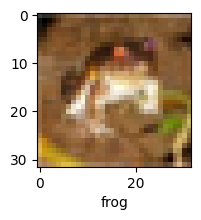

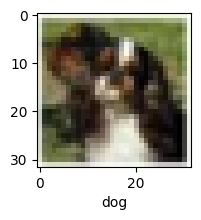

In [3]:
# Function to plot sample images
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

# Plot sample images from the training set
plot_sample(X_train, y_train, 0)
plot_sample(X_train, y_train, 500)

In [4]:
# Normalize the pixels values between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# Build a simple artificial neural network for image classification
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])
ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 199s 124ms/step - loss: 1.8154 - accuracy: 0.3514
Epoch 2/30
1563/1563 [==============================] - 183s 117ms/step - loss: 1.6258 - accuracy: 0.4260
Epoch 3/30
1563/1563 [==============================] - 186s 119ms/step - loss: 1.5453 - accuracy: 0.4574
Epoch 4/30
1563/1563 [==============================] - 186s 119ms/step - loss: 1.4848 - accuracy: 0.4753
Epoch 5/30
1563/1563 [==============================] - 183s 117ms/step - loss: 1.4338 - accuracy: 0.4977
Epoch 6/30
1563/1563 [==============================] - 183s 117ms/step - loss: 1.3928 - accuracy: 0.5094
Epoch 7/30
1563/1563 [==============================] - 182s 117ms/step - loss: 1.3554 - accuracy: 0.5249
Epoch 8/30
1563/1563 [==============================] - 186s 119ms/step - loss: 1.3183 - accuracy: 0.5368
Epoch 9/30
1563/1563 [==============================] - 185s 119ms/step - loss: 1.2856 - accuracy: 0.5494
Epoch 10/30
1563/1563 [=======================

In [6]:
# Evaluate the ANN model
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 8s 24ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.73      0.62      1000
           1       0.70      0.66      0.68      1000
           2       0.53      0.36      0.43      1000
           3       0.37      0.38      0.37      1000
           4       0.38      0.66      0.48      1000
           5       0.46      0.43      0.44      1000
           6       0.79      0.41      0.54      1000
           7       0.61      0.63      0.62      1000
           8       0.67      0.68      0.67      1000
           9       0.69      0.54      0.60      1000

    accuracy                           0.55     10000
   macro avg       0.57      0.55      0.55     10000
weighted avg       0.57      0.55      0.55     10000



In [7]:
# Build a convolutional neural network to train the images
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=100)

Epoch 1/100
1563/1563 [==============================] - 49s 30ms/step - loss: 1.4428 - accuracy: 0.4791
Epoch 2/100
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1033 - accuracy: 0.6138
Epoch 3/100
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9713 - accuracy: 0.6606
Epoch 4/100
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8855 - accuracy: 0.6921
Epoch 5/100
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8144 - accuracy: 0.7153
Epoch 6/100
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7519 - accuracy: 0.7380
Epoch 7/100
1563/1563 [==============================] - 720s 461ms/step - loss: 0.6964 - accuracy: 0.7578
Epoch 8/100
1563/1563 [==============================] - 38s 24ms/step - loss: 0.6484 - accuracy: 0.7736
Epoch 9/100
1563/1563 [==============================] - 37s 24ms/step - loss: 0.5996 - accuracy: 0.7893
Epoch 10/100
1563/1563 [=============================

In [8]:
# Evaluate the CNN model
cnn.evaluate(X_test, y_test)

y_pred = cnn.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]

313/313 [==============================] - 3s 8ms/step


In [9]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.69      0.70      1000
           1       0.82      0.78      0.80      1000
           2       0.59      0.57      0.58      1000
           3       0.45      0.48      0.47      1000
           4       0.61      0.59      0.60      1000
           5       0.55      0.56      0.56      1000
           6       0.75      0.72      0.73      1000
           7       0.68      0.69      0.69      1000
           8       0.78      0.79      0.78      1000
           9       0.72      0.76      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



In [10]:
# We have exported our model
with open('cnn_model.pkl','wb') as files:
    pickle.dump(cnn,files)